**MNIST classification using numpy and neural networks**




loading MNIST dataset from Keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

**Data preparation, augmentation using Keras**

Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# Load the data
train = pd.read_csv("/content/gdrive/My Drive/MS 2nd Semester/Deep Learning/Assignments/Assignment 1/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/MS 2nd Semester/Deep Learning/Assignments/Assignment 1/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

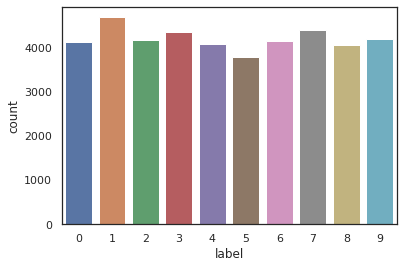

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
# Set the random seed
random_seed = 2

In [0]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

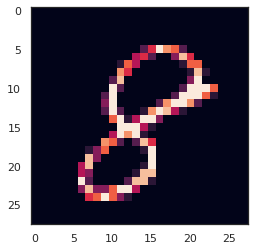

In [13]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

#Data Augmentation

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(X_train)


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:

import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

In [0]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

# Neural Network using numpy

In [0]:
import numpy as np

np.random.seed(1)

In [0]:
class NeuralNetwork:
  def relu(x):
    return (x >= 0) * x


  def relu2deriv(output):
    return output >= 0
  
  batch_size = 100
  alpha, iterations = (0.001, 300)


  pixels_per_image, num_labels, hidden_size = (784, 10, 100)
  weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.1
  weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1


  for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(X_train)/ batch_size)):
      batch_start, batch_end = ((i * batch_size), ((i+1)*batch_size))

      layer_0 = X_train[batch_start:batch_end]
      layer_1 = relu(np.dot(layer_0, weights_0_1))
      dropout_mask = np.random.randint(2, size=layer_1.shape)
      layer_1 *= dropout_mask * 2
      layer_2 = np.dot(layer_1, weights_1_2)



      error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)

      for k in range(batch_size):
        correct_cnt += int(np.argmax(layer_2[k:k+1]) == \
                          np.argmax(labels[batch_start + k : batch_Start + k+1]))
        
        layer_2_delta = (labels[batch_start: batch_end] - layer2) / batch_size

        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)


        if (j % 10 == 0):
          test_error = 0.0
          test_correct_cnt = 0

          for i in range(len(X_val)):
            layer_0 = X_val[i : i+1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)




NameError: ignored